In [1]:
import igraph as ig#version 0.10.4 returned Node with 17916 
import cairo
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_info = pd.read_csv('Model_Dataset.csv')
df_info = df_info.fillna(0)
df_info = df_info.drop(columns='Unnamed: 0')
df_info.head()

,Provider,PotentialFraud,In_weight_count_Degree,In_weight_count_Betweenness,In_weight_count_Closeness,In_weight_reimburse_Degree,In_weight_reimburse_Betweenness,In_weight_reimburse_Closeness,In_weight_physician_Degree,In_weight_physician_Betweenness,...,Out_BeneCount,Out_InscClaimAmtReimbursed,Out_NumberOfPhysician,Out_ClmDiagnosisCode_Count,Out_ClmProcedureCode_Count,Full_BeneCount,Full_InscClaimAmtReimbursed,Full_NumberOfPhysician,Full_ClmDiagnosisCode_Count,Full_ClmProcedureCode_Count
0,PRV51001,No,7.000,0.000,0.159,236500.000,0.000,0.159,13.500,0.000,...,20.000,382.000,1.600,2.200,0.000,25,4185.600,1.600,3.200,0.120
1,PRV51003,Yes,26.000,0.002,0.163,196233.340,0.002,0.163,41.320,0.002,...,70.000,466.714,1.429,2.714,0.000,132,4588.409,1.530,5.250,0.364
2,PRV51004,No,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,149.000,350.134,1.604,2.584,0.000,149,350.134,1.604,2.584,0.000
3,PRV51005,Yes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1165.000,241.124,1.599,2.589,0.000,1165,241.124,1.599,2.589,0.000
4,PRV51007,No,3.000,0.000,0.158,17166.660,0.000,0.158,4.160,0.000,...,69.000,213.188,1.536,2.797,0.000,72,468.194,1.528,2.986,0.014


In [3]:
df_info.groupby('PotentialFraud').agg(['mean', 'std','max','min']).reset_index()

PotentialFraud In_weight_count_Degree                       \
                                   mean    std     max   min   
0             No                  2.002  5.769  82.000 0.000   
1            Yes                 28.528 38.946 384.000 0.000   

  In_weight_count_Betweenness                   In_weight_count_Closeness  \
                         mean   std   max   min                      mean   
0                       0.000 0.002 0.054 0.000                     0.046   
1                       0.005 0.014 0.180 0.000                     0.161   

   ... Full_NumberOfPhysician       Full_ClmDiagnosisCode_Count               \
   ...                    max   min                        mean   std    max   
0  ...                  3.000 0.500                       3.302 1.685 10.000   
1  ...                  2.143 1.163                       4.429 1.804  9.000   

        Full_ClmProcedureCode_Count                    
    min                        mean   std   max   min  
0 0.000                       0.093 0.240 3.000 0.000  
1 1.333                       0.252 0.262 1.375 0.000  

[2 rows x 421 columns]

In [4]:
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import shapiro 

for col in df_info.columns[2:]:
    no_group = df_info.loc[df_info.PotentialFraud == 'No'][col]
    yes_group = df_info.loc[df_info.PotentialFraud == 'Yes'][col]
    if ttest_ind(no_group, yes_group)[1] > 0.05:
        print(col)
        print(df_info[['PotentialFraud',col]].groupby('PotentialFraud').agg(['count','mean', 'std','max','min']).reset_index())

C:\Users\zhizh\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:650: RuntimeWarning: invalid value encountered in scalar divide
  tstat = (value1 - value2 - diff) / std_diff


Out_NumberOfPhysician
  PotentialFraud Out_NumberOfPhysician                        
                                 count  mean   std   max   min
0             No                  4904 1.442 0.460 3.000 0.000
1            Yes                   506 1.424 0.457 3.000 0.000
Out_ClmDiagnosisCode_Count
  PotentialFraud Out_ClmDiagnosisCode_Count                         
                                      count  mean   std    max   min
0             No                       4904 2.422 0.948  9.000 0.000
1            Yes                        506 2.404 0.911 10.000 0.000


Out_weight_count_Closeness
ShapiroResult(statistic=0.9984016418457031, pvalue=0.0001601452677277848)
ShapiroResult(statistic=0.9941837191581726, pvalue=0.07532133162021637)


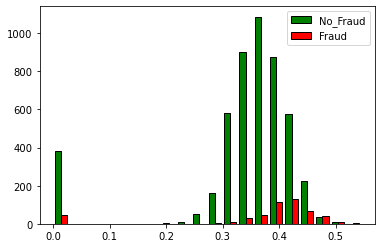

Out_weight_reimburse_Closeness
ShapiroResult(statistic=0.9984016418457031, pvalue=0.0001601452677277848)
ShapiroResult(statistic=0.9941837191581726, pvalue=0.07532133162021637)


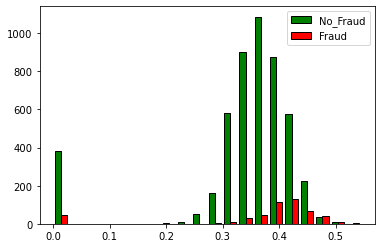

Out_weight_physician_Closeness
ShapiroResult(statistic=0.9984016418457031, pvalue=0.0001601452677277848)
ShapiroResult(statistic=0.9941837191581726, pvalue=0.07532133162021637)


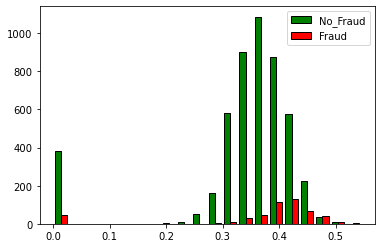

Out_weight_diagnosis_Closeness
ShapiroResult(statistic=0.9984016418457031, pvalue=0.0001601452677277848)
ShapiroResult(statistic=0.9941837191581726, pvalue=0.07532133162021637)


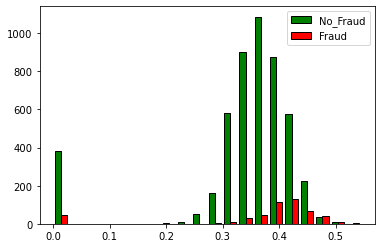

Out_weight_procedure_Closeness
ShapiroResult(statistic=0.9984016418457031, pvalue=0.0001601452677277848)
ShapiroResult(statistic=0.9941837191581726, pvalue=0.07532133162021637)


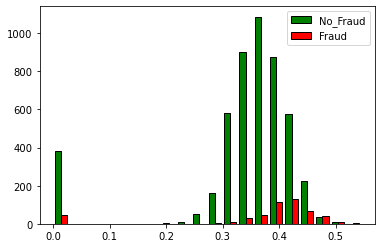

Full_weight_count_Closeness
ShapiroResult(statistic=0.9975170493125916, pvalue=3.933923835575115e-07)
ShapiroResult(statistic=0.9951915740966797, pvalue=0.11851327866315842)


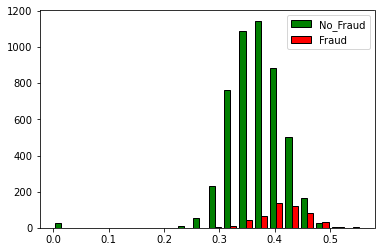

Full_weight_reimburse_Closeness
ShapiroResult(statistic=0.9975170493125916, pvalue=3.933923835575115e-07)
ShapiroResult(statistic=0.9951915740966797, pvalue=0.11851327866315842)


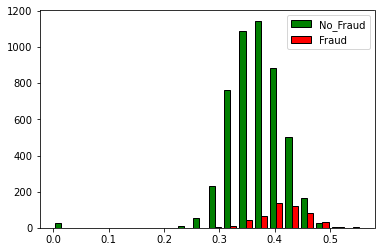

Full_weight_physician_Closeness
ShapiroResult(statistic=0.9975170493125916, pvalue=3.933923835575115e-07)
ShapiroResult(statistic=0.9951915740966797, pvalue=0.11851327866315842)


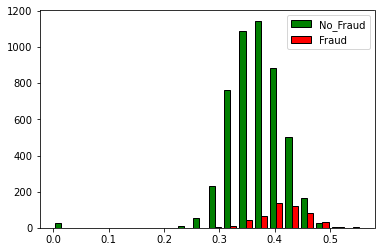

Full_weight_diagnosis_Closeness
ShapiroResult(statistic=0.9975170493125916, pvalue=3.933923835575115e-07)
ShapiroResult(statistic=0.9951915740966797, pvalue=0.11851327866315842)


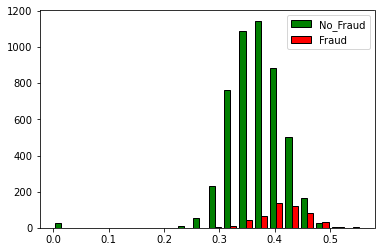

Full_weight_procedure_Closeness
ShapiroResult(statistic=0.9975170493125916, pvalue=3.933923835575115e-07)
ShapiroResult(statistic=0.9951915740966797, pvalue=0.11851327866315842)


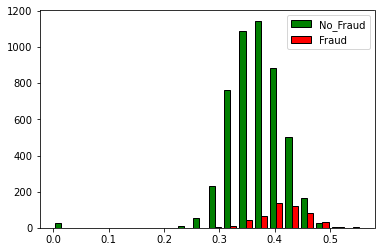

Out_weight_count_Closeness_dist
ShapiroResult(statistic=0.9984018206596375, pvalue=0.0001603642595000565)
ShapiroResult(statistic=0.9941838383674622, pvalue=0.07532927393913269)


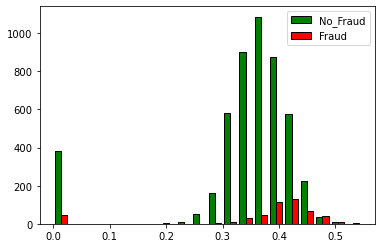

Out_weight_reimburse_Closeness_dist
ShapiroResult(statistic=0.9984018206596375, pvalue=0.0001603642595000565)
ShapiroResult(statistic=0.9941838383674622, pvalue=0.07532927393913269)


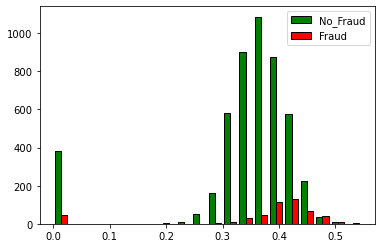

Out_weight_physician_Closeness_dist
ShapiroResult(statistic=0.9984018206596375, pvalue=0.0001603642595000565)
ShapiroResult(statistic=0.9941838383674622, pvalue=0.07532927393913269)


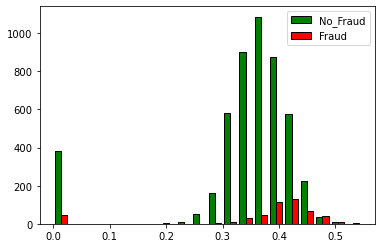

Out_weight_diagnosis_Closeness_dist
ShapiroResult(statistic=0.9984018206596375, pvalue=0.0001603642595000565)
ShapiroResult(statistic=0.9941838383674622, pvalue=0.07532927393913269)


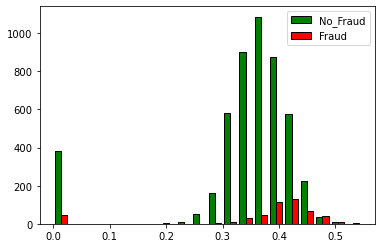

Out_weight_procedure_Closeness_dist
ShapiroResult(statistic=0.9984018206596375, pvalue=0.0001603642595000565)
ShapiroResult(statistic=0.9941838383674622, pvalue=0.07532927393913269)


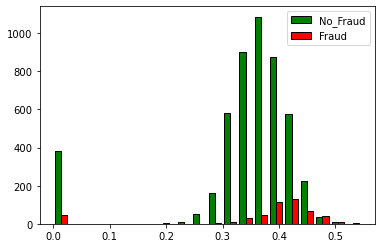

Full_weight_count_Closeness_dist
ShapiroResult(statistic=0.9975165724754333, pvalue=3.924883458239492e-07)
ShapiroResult(statistic=0.9951916933059692, pvalue=0.11852668225765228)


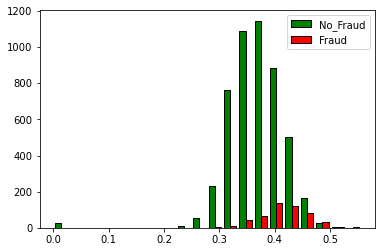

Full_weight_reimburse_Closeness_dist
ShapiroResult(statistic=0.9975165724754333, pvalue=3.924883458239492e-07)
ShapiroResult(statistic=0.9951916933059692, pvalue=0.11852668225765228)


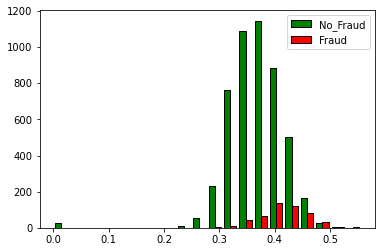

Full_weight_physician_Closeness_dist
ShapiroResult(statistic=0.9975165724754333, pvalue=3.924883458239492e-07)
ShapiroResult(statistic=0.9951916933059692, pvalue=0.11852668225765228)


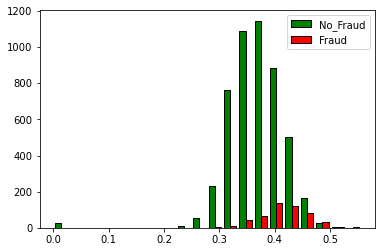

Full_weight_diagnosis_Closeness_dist
ShapiroResult(statistic=0.9975165724754333, pvalue=3.924883458239492e-07)
ShapiroResult(statistic=0.9951916933059692, pvalue=0.11852668225765228)


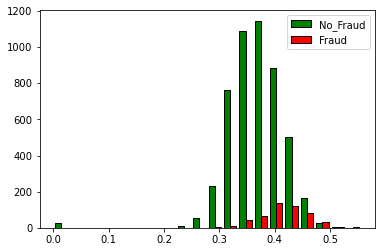

Full_weight_procedure_Closeness_dist
ShapiroResult(statistic=0.9975165724754333, pvalue=3.924883458239492e-07)
ShapiroResult(statistic=0.9951916933059692, pvalue=0.11852668225765228)


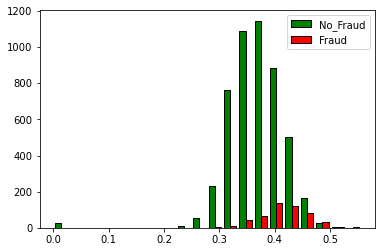

In [5]:
#Just for fun
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import shapiro 
import statsmodels.api as sm

for col in df_info.columns[2:]:
    no_group = df_info.loc[(df_info.PotentialFraud == 'No') & (df_info[col]>0)][col]
    yes_group = df_info.loc[(df_info.PotentialFraud == 'Yes')& (df_info[col]>0)][col]
    try:
        normality_no = shapiro(no_group)
        normality_yes = shapiro(yes_group)
    except:
        continue
    if normality_no[1] > 0.05 or normality_yes[1] > 0.05:
        print(col)
        print(shapiro(no_group))
        print(shapiro(yes_group))
        fraud = df_info.PotentialFraud.unique()
        colors = ['green','red']
        plt.hist([df_info.loc[df_info.PotentialFraud == x, col] for x in fraud], edgecolor='black', bins=20, label = fraud, color=colors)
        plt.legend(['No_Fraud', 'Fraud'])
        plt.show()